# Linear Regression Example

Using a single neuron to find the line of best fit given sample points

## Initialization

In [2]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.core.display import HTML

In [105]:
# Create dataset
def generate_points(samples, a, b, deviation_range=1):
    X = []
    Y = []

    for _ in range(samples):
        x = random.uniform(0, 10)
        y = a * x + b + random.uniform(-deviation_range, deviation_range)

        X.append(x)
        Y.append(y)

    return X, Y

# Line target parameters
a = 2
b = 5

X, Y = generate_points(samples=20, a=a, b=b)
X, Y = torch.tensor(X), torch.tensor(Y)
X = X.view(-1, 1)

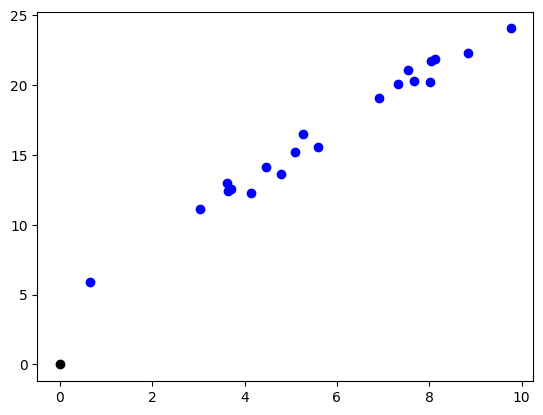

In [106]:
# Visualize training data
plt.scatter(0, 0, color='black')
plt.scatter(X, Y, color='blue')


## Neural Network Training

In [113]:
# Initialize parameters

W = torch.randn(1, 1)
B = torch.randn(1)

parameters = [W, B]

for p in parameters:
  p.requires_grad = True


In [114]:
lr = 0.01
steps = 2000
predictions = []

for i in range(steps):
  # forward pass
  y = X @ W + B

  loss = torch.nn.functional.mse_loss(y.view(-1), Y)

  # backwards
  for p in parameters:
    p.grad = None

  loss.backward()

  if i % 50 == 0:
    print(f'{i}/{steps} / loss: {loss}')
    predictions.append([W.item(), B.item()])

  # optimization
  for p in parameters:
    p.data += -lr * p.grad

print('')
print('=======================')
print(f'Expected a to be {a}, got {W.item()}')
print(f'Expected b to be {b}, got {B.item()}')


0/2000 / loss: 392.4556579589844
50/2000 / loss: 3.295825481414795
100/2000 / loss: 2.612825632095337
150/2000 / loss: 2.087850570678711
200/2000 / loss: 1.6843369007110596
250/2000 / loss: 1.3741838932037354
300/2000 / loss: 1.1357897520065308
350/2000 / loss: 0.9525529742240906
400/2000 / loss: 0.8117104768753052
450/2000 / loss: 0.7034557461738586
500/2000 / loss: 0.6202463507652283
550/2000 / loss: 0.5562896728515625
600/2000 / loss: 0.5071301460266113
650/2000 / loss: 0.4693443179130554
700/2000 / loss: 0.4403013586997986
750/2000 / loss: 0.41797834634780884
800/2000 / loss: 0.4008195400238037
850/2000 / loss: 0.3876309394836426
900/2000 / loss: 0.37749388813972473
950/2000 / loss: 0.36970165371894836
1000/2000 / loss: 0.3637126088142395
1050/2000 / loss: 0.359109491109848
1100/2000 / loss: 0.3555710017681122
1150/2000 / loss: 0.3528517782688141
1200/2000 / loss: 0.3507612347602844
1250/2000 / loss: 0.3491543233394623
1300/2000 / loss: 0.3479193150997162
1350/2000 / loss: 0.346970

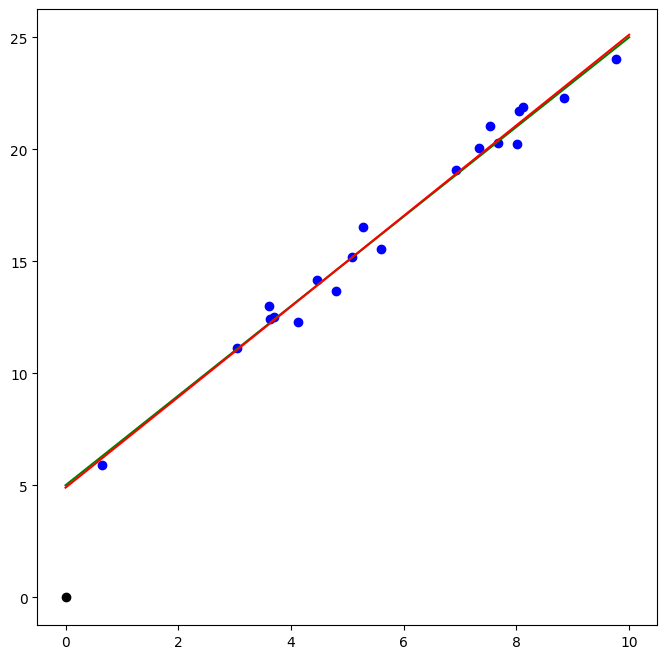

In [115]:
# Visualize training
fig = plt.figure(figsize=(8, 8))

plt.scatter(0, 0, color='black')
plt.scatter(X, Y, color='blue')

x_line = np.array([0, 10])
y_line = 2 * x_line + 5
plt.plot(x_line, y_line, color='green') # Target line
line, = plt.plot([], [], color='red')

def animate(i):
  prediction = predictions[i]
  x_line = np.array([0, 10])  # X-axis points
  y_line = prediction[0] * x_line + prediction[1]
  line.set_data(x_line, y_line)
  return line,


ani = animation.FuncAnimation(fig, animate, interval=100, blit=True, save_count=len(predictions))

HTML(ani.to_html5_video())